<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/minimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 6: Minimax Risk Optimization**

We aim to recognize two different kinds of network traffic: 
normal ($\omega_1$) and intrusive ($\omega_2$). 
We assume that each sample $x$ is represented with a single feature 
(numerical) value, and  that the likelihood of class $k$ 
(with $k=1,2$) is given as:

$$
\begin{equation}
p(x | \omega_k) = \mathcal N_k(x) = \mathcal N(x | \mu_k, \sigma_k) =
\frac{1}{\sqrt{2 \pi} \sigma_k} 
\exp{\left 
[-\frac{1}{2} \left (\frac{x-\mu_k}{\sigma} \right )^2 
\right ]}.
\end{equation}
$$

The parameters for the two classes are: $\mu_1=0$, $\mu_2=4$, and $\sigma_1=\sigma_2=1$. 

We suppose that *the prior probabilities are not available* (e.g. their estimation is not reliable, or they are time-variant, etc), while the cost matrix (predicted vs true class labels) is:

$$
\begin{equation}
\Lambda = 
\begin{bmatrix} 
\lambda_{1,1} & \lambda_{1,2} \\ 
\lambda_{2,1} & \lambda_{2,2}
\end{bmatrix} = 
\begin{bmatrix} 
0 & 2 \\ 
1 & 0
\end{bmatrix}.
\end{equation}
$$


Find the decision regions (and the decision rule) using the minimax criterion (which minimizes the maximum worst-case risk).




**Solution.** The total risk is given as:
$R = \int_{\mathcal R_1} \left ( \lambda_{1,1} P_1 \mathcal N_1 + \lambda_{1,2} P_2 \mathcal N_2 \right) dx + \int_{\mathcal R_2}\left(  \lambda_{2,1} P_1 \mathcal N_1 + \lambda_{2,2} P_2 \mathcal N_2\right) dx$.


By using the given costs $\Lambda$ and noting that $P_1 = 1-P_2$, we can simplify it as: 
$R= 2 (1-P_1)\int_{\mathcal R_1}  \mathcal N_2 dx + P_1 \int_{\mathcal R_2}  \mathcal N_1  dx$.


Reordering and making explicit that the decision regions are $\mathcal R_1 = (-\infty, a)$ and $\mathcal R_2 = [a, +\infty)$, we get:

$$
\begin{equation}
R(a, P_1)= 2\int_{-\infty}^a  \mathcal N_2 dx + P_1 \left [ \int_{a}^\infty  \mathcal N_1  dx - 2\int_{-\infty}^a  \mathcal N_2 dx\right ] \, ,
\end{equation}
$$

where we also made it explicit that $R$ depends on two variables, namely, the decision boundary $a$ and the prior probability $P_1$. The former captures the shape of the decision regions, while the latter characterizes the data distribution.

For convenience, since $\int_{a}^\infty  \mathcal N_1  dx = 1-\int_{-\infty}^a  \mathcal N_1  dx$, the aforementioned risk function can be also written as:
$R(a, P_1)= 2\int_{-\infty}^a  \mathcal N_2 dx + P_1 \left [ 1-\int_{-\infty}^a  \mathcal N_1  dx - 2\int_{-\infty}^a  \mathcal N_2 dx\right ]$.

The minimax-risk decision regions, that is, the value of $a$, can be computed then by imposing the derivative of this function w.r.t. $P_1$ equal to zero, which simply amounts to (numerically) solving the following equation:
$ 1-\int_{-\infty}^a  \mathcal N_1  dx - 2\int_{-\infty}^a  \mathcal N_2 dx = 0$.


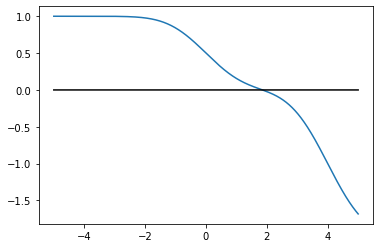

a*:  1.853


In [0]:
# finding the optimal value "a*"
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def grad_risk_p1(a):
  '''This is the derivative of the risk taken w.r.t. P1.'''
  return 1-norm.cdf(a,loc=mu1,scale=sigma1)-2*norm.cdf(a,loc=mu2,scale=sigma2)

mu1=0
mu2=4
sigma1=1
sigma2=1

a=np.arange(-5, 5, step=0.001)
grad_risk = grad_risk_p1(a)
plt.plot(a, grad_risk)
plt.plot(a, a*0, 'k')
plt.show()

#The optimal a* value lies at the intersection
a_star = max(a[grad_risk >= 0])
print('a*: ', np.round(a_star, decimals=4))

Thus, the decision regions are: $\mathcal R_1 = (-\infty, a^\star)$ and $\mathcal R_2 = [a^\star, +\infty)$, which means that we decide for $\omega_1$ if $x < a^\star$ and for $\omega_2$ if $x \geq a^\star$.

**Extra on minimax risk optimization.** Now, one may wonder how to compute the optimal value $P^\star_1$ that would allow us to compute the corresponding minimax threshold $\theta^\star$ on the likelihood ratio.

Recall indeed that the minimum-risk decision rule is:
$l(x) = \frac{p(x|\omega_1)}{p(x|\omega_2)} \gtrless\theta = \frac{\lambda_{12}-\lambda_{22}}{\lambda_{21}-\lambda_{11}}\frac{P_2}{P_1}$. 

Thus, using the values in our exercise, the optimal minimax threshold would be given as $\theta^\star = 2\frac{1-P^\star_1}{P^\star_1}$. However, to compute such value we will need to find $P^\star_1$ corresponding to the optimal minimax solution.

Before doing that, we would like to clarify the minimax problem formulation from the mathematical perspective, using the given exercise as a specific instance of its more general formulation.
In general, the goal of minimax risk optimization is to find the decision regions (parametrized by $a$ in our case) that minimize the worst-case risk (maximized w.r.t. $P_1$). This is captured by the following optimization problem: 

$$
\begin{equation}
\min_a \max_{P_1} R(a,P_1) = 2\int_{-\infty}^a  \mathcal N_2 dx + P_1 \left [ \int_{a}^\infty  \mathcal N_1  dx - 2\int_{-\infty}^a  \mathcal N_2 dx\right ] \, ,
\end{equation}
$$

where we also reported the explicit risk computation for our exercise.
The risk $R$ is a function of two variables. So we can plot it in the two-dimensional space spanned by $a$ and $P_1$ using a colormap to denote the values of $R$ (along the third axis).

Minimax risk:  0.03179328161556514


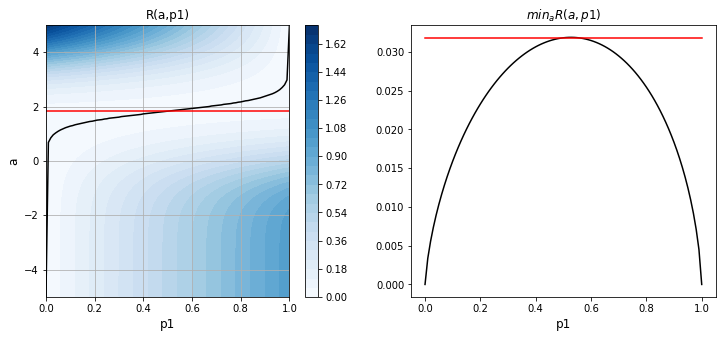

In [0]:
min_a = -5
max_a = 5
min_p1 = 0
max_p1 = 1
res = 0.1

def R(p1, a, mu1, sigma1, mu2, sigma2):
    # This function computes the risk
    n1 = norm.cdf(a,loc=mu1,scale=sigma1)
    n2 = norm.cdf(a,loc=mu2,scale=sigma2)
    return 2 * n2 + p1 * (1-n1-2*n2)


def plot_fun(fun, only_at_zero=False, min_x=-5, max_x=+5, min_y=-5, max_y=+5,
             resolution=0.5, **kwargs):
    xx1, xx2 = np.meshgrid(np.arange(min_x, max_x, resolution),
                           np.arange(min_y, max_y, resolution))
    x = np.array([xx1.ravel(), xx2.ravel()]).T
    z = np.zeros(shape=(x.shape[0],))
    for i in range(x.shape[0]):
        z[i] = fun(x[i, 0], x[i, 1], **kwargs)
    z = z.reshape(xx1.shape)
    if not only_at_zero:
        plt.contourf(xx1, xx2, z, 30, cmap='Blues')
    else:
        plt.contour(xx1, xx2, z, [0], colors=['k'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    return

def find_min_R_a(min_p1, max_p1, min_a, max_a, res_p1, res_a, **kwargs):
    """
    For each p1, compute a* that gives the minimum value of R(a,p1).
    Then return the value of a* and R(a*, p1)
    """
    p1_vals = np.arange(min_p1, max_p1+res_p1, res_p1)
    a_vals = np.arange(min_a, max_a+res_a, res_a)
    min_a_vals = np.zeros((p1_vals.size,), dtype=float)
    min_r_vals = np.zeros((p1_vals.size,), dtype=float)

    for i, p1 in enumerate(p1_vals):
        r_vals = np.arange(a_vals.size, dtype=float)
        for j, a in enumerate(a_vals):
            r_vals[j] = R(p1, a, **kwargs)
        min_r_vals[i] = r_vals.min()
        min_a_vals[i] = a_vals[r_vals.argmin()]
    return p1_vals, a_vals, min_a_vals, min_r_vals


p1_vals, a_vals, min_a_vals, min_r_vals = find_min_R_a(
    min_p1, max_p1, min_a, max_a, res_p1=0.01, res_a=0.01, 
    mu1=mu1, sigma1=sigma1, mu2=mu2, sigma2=sigma2)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5

plt.subplot(1,2,1)
plot_fun(R, False, min_p1, max_p1+res, min_a, max_a+res, 
         res, mu1=mu1, sigma1=sigma1, mu2=mu2, sigma2=sigma2)
plt.colorbar()
plt.grid()
plt.plot(p1_vals, min_a_vals, c='k')
plt.plot(p1_vals, [a_star] * p1_vals.size, c='r')
plt.xlabel('p1', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.title("R(a,p1)")

plt.subplot(1,2,2)

# value of the minimax optimal risk:
R_mm = 2 * norm.cdf(a_star,mu2,sigma2)
print('Minimax risk: ', R_mm)

plt.plot(p1_vals, min_r_vals, c='k')
plt.plot(p1_vals, [R_mm] * p1_vals.size, c='r')
plt.xlabel('p1', fontsize=12)
plt.title(r"$min_a R(a,p1)$")

plt.show()




As one can see from the leftmost plot, if we fix $a$, then the risk varies linearly as $P_1$ changes (the function varies linearly if we consider lines parallel to the x-axis), except when $a=a^\star=1.853$ (red line). For this value, in fact, the risk remains constant and equal to:

$
\begin{equation}
R_{\rm mm} = R(a^\star, P_1) = 2\int_{-\infty}^{a^\star}  \mathcal N_2 dx + P_1 \underbrace{\left [ \int_{a^\star}^\infty  \mathcal N_1  dx - 2\int_{-\infty}^{a^\star}  \mathcal N_2 dx\right ]}_{=0} = 2\int_{-\infty}^a  \mathcal N_2 dx \, .
\end{equation}
$

This is the minimax optimal risk.

The black line in the rightmost plot shows the values of $\min_a R(a, P^\prime_1)$, i.e., the minimum risk for any fixed $P^\prime_1$ value. These are the same values on the black line extrapolated from the leftmost plot. The red line shows instead the minimax risk $R_{\rm mm}$ computed at $a^\star$ and $P_1^\star$, which basically bounds the worst possible value found along the black line.



The goal now is to find not only the value of $a^\star$ but also the optimal value of $P_1$, i.e., $P_1^\star$, corresponding to the saddle point of the given problem.

In our example, they can be find analytically by setting the first derivatives of $R$ equal to zero (we did this only w.r.t. $P_1$ when solving the exercise to find $a^\star$ - but we need a second equation to find $P^\star_1$).

The derivatives are given as:

$$
\begin{eqnarray}
\frac{\partial R}{\partial P_1} &=& 1-\int_{-\infty}^a  \mathcal N_1(x)  dx - 2\int_{-\infty}^a  \mathcal N_2(x) dx = 0 \, , \\
\frac{\partial R}{\partial a} &=& 2 \mathcal N_2(a) - P_1 \left (\mathcal N_1(a) +2\mathcal N_2(a) \right) = 0 \, ,
\end{eqnarray}
$$

where we used the fact that $\frac{\partial }{\partial x} \int_{-\infty}^{x} f(v) dv = f(x)$ to compute the derivative in the second equation.

We know from the first equation that $a^\star \approxeq 1.853$ (via numerical solution). 

By replacing this value in the second equation, we can find $P_1^\star = \frac{2 \mathcal N_2(a^\star)}{\mathcal N_1(a^\star) +2\mathcal N_2(a^\star)}\approxeq 0.526$, and the optimal threshold for the likelihood ratio $\theta^\star \approxeq 1.80$.

By imposing this threshold on the likelihood ratio, regardless of the priors, we will always observe a constant value of the risk (i.e., the worst-case one we computed before, $R_{\rm mm} \approxeq 0.032$).

In [0]:
n1 = norm.pdf(a_star, mu1, sigma1)
n2 = norm.pdf(a_star, mu2, sigma2)

p1_star = 2.0 * n2 / (n1+2.0*n2)
print("P_1*: ", p1_star)

theta_star = 2.0*(1-p1_star)/p1_star
print("theta*: ", theta_star)

P_1*:  0.5262626031420929
theta*:  1.8003840441232952
